In [50]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from scipy.stats import mode
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.metrics import auc
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth',500)
pd.set_option('display.max_columns',5000)

encoder = LabelEncoder()
from IPython.display import Image
import os
!ls ../input/

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [52]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
data = pd.read_excel('SBA_National-Final.xlsx')

In [54]:
for dataset in [data]:
    dataset.loc[(dataset['MIS_Status']) == 'P I F', 'MIS_Status'] = 0
    dataset.loc[(dataset['MIS_Status']) == 'CHGOFF', 'MIS_Status'] = 1

In [55]:
for dataset in [data]:
    dataset['ChgOffDate'].fillna(0, inplace=True)  # Sửa các giá trị NaN thành 0
    dataset.loc[(dataset['ChgOffDate']) != 0, 'ChgOffDate'] = 1  # Sửa các giá trị khác NaN thành 1

In [56]:

data['NAICS'] = data['NAICS'].apply(lambda x: int(str(x)[:2]))


Phân loại thời hạn vay tính theo tháng:
Vay ngắn hạn (1-12)
Vay trung hạn (13-60)
Vay dài hạn (>60)

In [57]:
for dataset in [data]:
    dataset.loc[((dataset['Term'] >=0 ) & (dataset['Term'] <=12)), 'Term'] = 1
    dataset.loc[((dataset['Term'] >=13 ) & (dataset['Term'] <=60)), 'Term'] = 2
    dataset.loc[((dataset['Term'] >60 )),'Term'] = 3


Phân loại doanh nghiệp theo số lượng nhân viên:
Size class 1 (1 đến 4 nhân viên)
Size class 2 (5 đến 9 nhân viên)
Size class 3 (10 đến 19 nhân viên)
Size class 4 (20 đến 49 nhân viên)
Size class 5 (50 đến 99 nhân viên)
Size class 6 (100 đến 249 nhân viên)
Size class 7 (250 đến 499 nhân viên)
Size class 8 (500 đến 999 nhân viên)
Size class 9 (1,000 hoặc nhiều hơn)

In [58]:
for dataset in [data]:
    dataset.loc[((dataset['NoEmp'] >=0 ) & (dataset['NoEmp'] <=4)), 'NoEmp'] = 1
    dataset.loc[((dataset['NoEmp'] >=5 ) & (dataset['NoEmp'] <=9)), 'NoEmp'] = 2
    dataset.loc[((dataset['NoEmp'] >=10 ) & (dataset['NoEmp'] <=19)), 'NoEmp'] = 3
    dataset.loc[((dataset['NoEmp'] >=20 ) & (dataset['NoEmp'] <=49)), 'NoEmp'] = 4
    dataset.loc[((dataset['NoEmp'] >=50 ) & (dataset['NoEmp'] <=99)), 'NoEmp'] = 5
    dataset.loc[((dataset['NoEmp'] >=100 ) & (dataset['NoEmp'] <=249)), 'NoEmp'] = 6
    dataset.loc[((dataset['NoEmp'] >=250 ) & (dataset['NoEmp'] <=499)), 'NoEmp'] = 7
    dataset.loc[((dataset['NoEmp'] >=500 ) & (dataset['NoEmp'] <=999)), 'NoEmp'] = 8
    dataset.loc[((dataset['NoEmp'] >1000 )),'NoEmp'] = 9

In [59]:
# for dataset in [data]:
#     dataset.loc[((dataset['DisbursementGross'] >=0 ) & (dataset['DisbursementGross'] <=20000)), 'DisbursementGross'] = 0
#     dataset.loc[((dataset['DisbursementGross'] >20000 ) & (dataset['DisbursementGross'] <=40000)), 'DisbursementGross'] = 1
#     dataset.loc[((dataset['DisbursementGross'] >40000 )),'DisbursementGross'] = 2

In [60]:
# for dataset in [data]:
#     dataset.loc[((dataset['GrAppv'] >=0 ) & (dataset['GrAppv'] <=50000)), 'GrAppv'] = 0
#     dataset.loc[((dataset['GrAppv'] >50000 ) & (dataset['GrAppv'] <=200000)), 'GrAppv'] = 1
#     dataset.loc[((dataset['GrAppv'] >200000 )),'GrAppv'] = 2

Phân loại dựa trên khoản vay:
Microloans < 50,000$
7(a) loans: 50,000$ - 5,000,000$
504 loans: 5,000,000$ - 5,500,000$


In [61]:
for dataset in [data]:
    dataset.loc[((dataset['SBA_Appv'] >=0 ) & (dataset['SBA_Appv'] <=50000)), 'SBA_Appv'] = 1
    dataset.loc[((dataset['SBA_Appv'] >50000 ) & (dataset['SBA_Appv'] <=5000000)), 'SBA_Appv'] = 2
    dataset.loc[((dataset['SBA_Appv'] >5000000 ) & (dataset['SBA_Appv'] <=5500000)), 'SBA_Appv'] = 3

In [62]:
data

,LoanNr_ChkDgt,Name,City,State,Bank,BankState,NAICS,ApprovalDate,Term,NoEmp,NewExist,UrbanRural,ChgOffDate,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,FIFTH THIRD BANK,OH,45,28-Feb-97,3,1,2,0,0,28-Feb-99,60000,0,0,60000,1
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,1ST SOURCE BANK,IN,72,28-Feb-97,2,1,2,0,0,31-May-97,40000,0,0,40000,1
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,GRANT COUNTY STATE BANK,IN,62,28-Feb-97,3,2,1,0,0,31-Dec-97,287000,0,0,287000,2
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,2,1,1,0,0,30-Jun-97,35000,0,0,35000,1
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,3,3,1,0,0,14-May-97,229000,0,0,229000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893287,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,JPMORGAN CHASE BANK NATL ASSOC,IL,45,27-Feb-97,2,2,1,0,0,30-Sep-97,70000,0,0,70000,2
893288,9995603000,FABRIC FARMS,COLUMBUS,OH,JPMORGAN CHASE BANK NATL ASSOC,IL,45,27-Feb-97,2,2,1,0,0,31-Oct-97,85000,0,0,85000,1
893289,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,"RABOBANK, NATIONAL ASSOCIATION",CA,33,27-Feb-97,3,4,1,0,0,30-Sep-97,300000,0,0,300000,2
893290,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,BANK OF HAWAII,HI,0,27-Feb-97,2,2,1,0,1,31-Mar-97,75000,1,46383,75000,2


In [63]:
data['ChgOffDate'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: ChgOffDate, dtype: object

In [64]:
X=data.drop(['LoanNr_ChkDgt','Name','City','State','Bank','BankState','ApprovalDate','ChgOffDate','MIS_Status', 'DisbursementDate', 'ChgOffPrinGr'], axis=1)

Y=data['ChgOffDate']

In [65]:
X['NAICS'].dtype

dtype('int64')

In [66]:
Y=Y.astype('Int64')

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [68]:
data['ChgOffDate'] = pd.to_numeric(data['ChgOffDate'], errors='coerce')

In [69]:
Y_train.isnull().sum()

0

In [70]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, Y_train)

importance = model.feature_importances_


In [71]:
importance

array([0.12161589, 0.20005127, 0.02843495, 0.01110387, 0.06145081,
       0.34664242, 0.20478848, 0.02591232])

In [72]:
model.feature_names_in_

array(['NAICS', 'Term', 'NoEmp', 'NewExist', 'UrbanRural',
       'DisbursementGross', 'GrAppv', 'SBA_Appv'], dtype=object)

In [73]:
import matplotlib.pyplot as plt

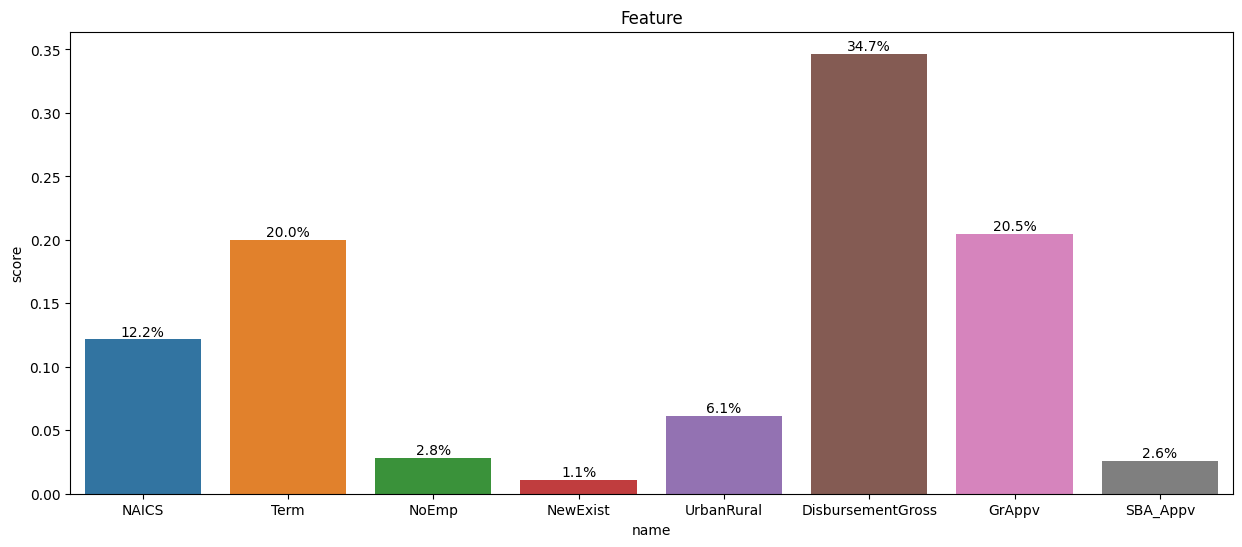

In [74]:
plt.figure(figsize=(15, 6))
importance_cols = pd.DataFrame({"name" : model.feature_names_in_,
                                "score" : model.feature_importances_})

plot = sns.barplot(x=importance_cols['name'], y=importance_cols['score'])
plot.set_title("Feature")

for p in plot.patches:
    percentage = f'{p.get_height() * 100:.1f}%'  # Calculate the percentage value
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plot.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

    

In [75]:
dts = pd.concat([X, Y], axis=1)

In [76]:
dts

,NAICS,Term,NoEmp,NewExist,UrbanRural,DisbursementGross,GrAppv,SBA_Appv,ChgOffDate
0,45,3,1,2,0,60000,60000,1,0
1,72,2,1,2,0,40000,40000,1,0
2,62,3,2,1,0,287000,287000,2,0
3,0,2,1,1,0,35000,35000,1,0
4,0,3,3,1,0,229000,229000,2,0
...,...,...,...,...,...,...,...,...,...
893287,45,2,2,1,0,70000,70000,2,0
893288,45,2,2,1,0,85000,85000,1,0
893289,33,3,4,1,0,300000,300000,2,0
893290,0,2,2,1,0,75000,75000,2,1


In [99]:
dts.to_excel('DA-RF.xlsx', index = None, header=True)

## CÂY QUYẾT ĐỊNH

In [78]:
from sklearn.ensemble import RandomForestClassifier

# Xác định và khởi tạo mô hình Random Forest
RF_new = RandomForestClassifier()

# Huấn luyện mô hình với dữ liệu huấn luyện (X_train, y_train)
RF_new.fit(X_train, Y_train)

tree_new = RF_new.estimators_[0]

In [79]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_new, out_file='tree_new_RF.dot', feature_names = [str(x) for x in X],
                          class_names = [str(x) for x in Y.unique()], rounded = True, proportion = False, precision = 2,
                           # Thiết lập kích thước của biểu đồ Graphviz
                           max_depth=3,  # Số tầng sâu tối đa của cây quyết định
                           filled=True,  # Tô màu các node 
                           impurity=False,  # Không hiển thị thông tin entropy/impurity
                           rotate=False,  # Xoay biểu đồ
)

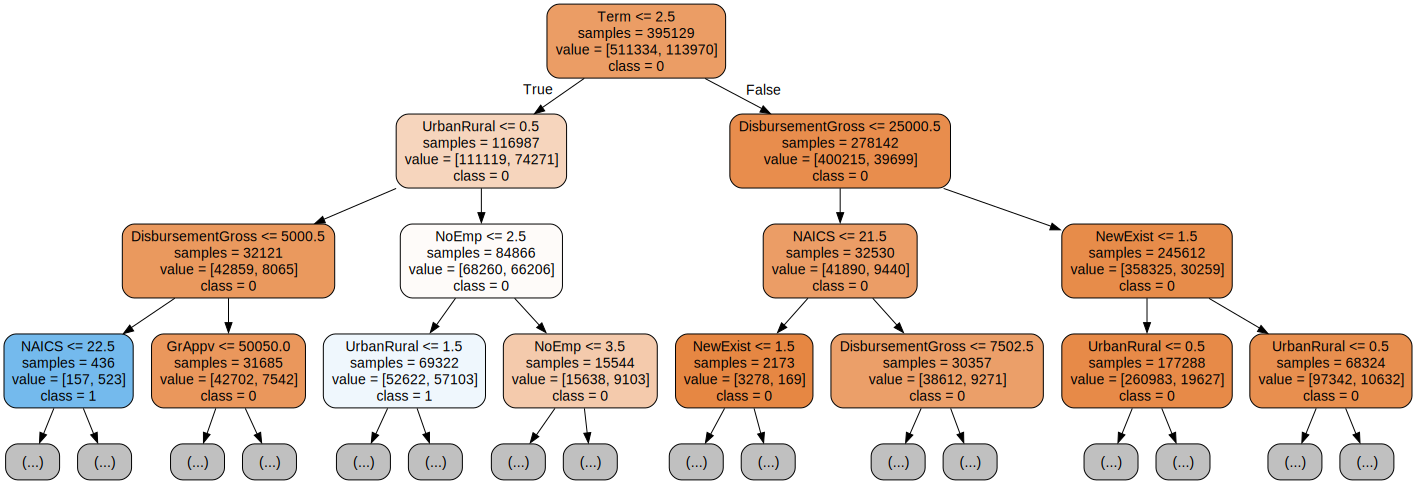

In [80]:
import graphviz
with open("tree_new_RF.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [81]:
new = {'NAICS': 42, 'Term': 1, 'NoEmp': 7, 'NewExist':2, 'UrbanRural':1,
       'DisbursementGross':2000, 'GrAppv':6000, 'SBA_Appv':2}

In [82]:
RF_new.predict(pd.DataFrame([new]))

array([0.])

In [89]:
X_pred = model.predict(X_test)

In [98]:
from sklearn.metrics import f1_score, accuracy_score

print('F1-score', f1_score(Y_test, X_pred, average='micro'))
print('Accuracy-score', accuracy_score(Y_test, X_pred))



F1-score 0.8393995253518814
Accuracy-score 0.8393995253518814
